In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import helper

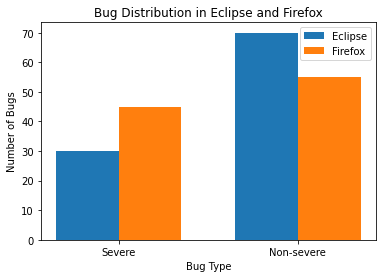

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Severe', 'Non-severe']
eclipse_bugs = [30, 70]  # Example data for Eclipse
firefox_bugs = [45, 55]  # Example data for Firefox

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, eclipse_bugs, width, label='Eclipse')
bars2 = ax.bar(x + width/2, firefox_bugs, width, label='Firefox')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Bug Type')
ax.set_ylabel('Number of Bugs')
ax.set_title('Data Distribution in Eclipse and Firefox')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


In [8]:
bugs_df= pd.read_csv("bugs_Calendar.csv")



# Dropped rows with severity level '--'
bugs_df = bugs_df[bugs_df["Severity"].str.contains("--")==False].reset_index()

#Dropped rows with Type "Enhancement" and "Task" because they are not a bug but a new feature
indexSevere = bugs_df[ (bugs_df['Type'] == 'enhancement') & (bugs_df['Type'] == 'enhancement') ].index
bugs_df.drop(indexSevere , inplace=True)

indexSevere = bugs_df[(bugs_df['Type'] == 'task') & (bugs_df['Type'] == 'task') ].index
bugs_df.drop(indexSevere , inplace=True)


#Catagorise the severity level into a Severe and Non Severe to make it a binary problem
bugs_df.loc[bugs_df["Severity"] == "blocker", "Severity"] = 'Severe'
bugs_df.loc[bugs_df["Severity"] == "critical", "Severity"] = 'Severe'
bugs_df.loc[bugs_df["Severity"] == "major", "Severity"] = 'Severe'
bugs_df.loc[bugs_df["Severity"] == "S1", "Severity"] = 'Severe'
bugs_df.loc[bugs_df["Severity"] == "S2", "Severity"] = 'Severe'
bugs_df.loc[bugs_df["Severity"] == "S3", "Severity"] = 'NonSevere'
bugs_df.loc[bugs_df["Severity"] == "normal", "Severity"] = 'NonSevere'
bugs_df.loc[bugs_df["Severity"] == "minor", "Severity"] = 'NonSevere'
bugs_df.loc[bugs_df["Severity"] == "trivial", "Severity"] = 'NonSevere'
bugs_df.loc[bugs_df["Severity"] == "S4", "Severity"] = 'NonSevere'

bugs_df = bugs_df.head(20)
print(bugs_df)

    index   Bug ID   Product                            Component  \
1       1  1727061  Calendar                     Provider: CalDAV   
3       3   458828  Calendar                     Provider: CalDAV   
4       4   462326  Calendar                              General   
5       5   299327  Calendar                       Lightning Only   
6       6   301484  Calendar                  Internal Components   
7       7   761178  Calendar                     Provider: CalDAV   
8       8  1008735  Calendar                    Calendar Frontend   
9       9  1588516  Calendar                    Calendar Frontend   
10     10  1623276  Calendar                     Provider: CalDAV   
11     11  1626391  Calendar                             Printing   
13     14  1738867  Calendar              Provider: Local Storage   
14     15  1083934  Calendar                      Provider: GData   
15     17   295387  Calendar                       Lightning Only   
16     18  1664016  Calendar      

In [9]:
# Apply the preprocessing function to the 'Summary' column
bugs_df['Processed_Summary'] = bugs_df['Summary'].apply(lambda x: helper.nlpsteps(x))


In [10]:
bugs_df['Lowered_Summary'] = bugs_df['Processed_Summary'].apply(lambda x: x.lower())

In [11]:
print(bugs_df['Lowered_Summary'])

1     m microsoft team meeting description mangled s...
3                    many error setting zimbra calendar
4                   thunderbird lightning leak shutdown
5                         event created appear next day
6         need strategy dealing tz change existing data
7     malformed url cause lightning delete complete ...
8     changing application timezone not update time ...
9     calendar start fails appmenu button missing to...
10    new event not appear today pane cached caldav ...
11    calendar event not print preview well printout...
13            recurring event missing agenda first load
14    google calendar provider ignores default new e...
15         calendar multiday view not display day event
16    recent change broke blocking master password s...
20    accepting event secondly frequency recurrence ...
22    sending separate invitation attendee onlys sen...
23      imip bar button type not adjusted automatically
24    autocomplete widget entering email address

In [21]:
# Assuming you've already imported necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

# Initialize CountVectorizer
cv = CountVectorizer()
cv.fit(bugs_df['Lowered_Summary'])

# Transform the processed summaries
X_train = cv.transform(bugs_df['Lowered_Summary'])


# Assuming 'target' is correctly defined
target = bugs_df.iloc[:, -2].values
print("target", target)

# Initialize LinearSVC
svm = LinearSVC()

# Fit the model
svm.fit(X_train, target)

# Get the coefficients from the trained SVM model
coef = svm.coef_.ravel()

# Get the feature names from CountVectorizer
feature_names = cv.get_feature_names()

# Create a dictionary mapping feature names to coefficients
word_coefficients = {feature_names[i]: coef[i] for i in range(len(feature_names))}

# print(word_coefficients)

# Print the word list and their coefficients
for word, coefficient in word_coefficients.items():
#     print(f"{word}: {coefficient:.4f}")

    if coefficient < 0:
        severe_lexicons[word] = {"ratio": coefficient}
    else:
        non_severe_lexicons[word] = {"ratio": coefficient}

result = {
    "Severe Lexicons": severe_lexicons,
    "NonSevere Lexicon": non_severe_lexicons
}

print(result)


# severe_lexicons = {}
# non_severe_lexicons = {}

# for word, coefficient in word_coefficients.items():
#     if coefficient < 0:
#         severe_lexicons[word] = {"ratio": coefficient}
#     else:
#         non_severe_lexicons[word] = {"ratio": coefficient}

# result = {
#     "Severe Lexicons": severe_lexicons,
#     "NonSevere Lexicon": non_severe_lexicons
# }

# print(result)


target ['m microsoft team meeting description mangled stored google calendar'
 'many error setting zimbra calendar'
 'thunderbird lightning leak shutdown' 'event created appear next day'
 'need strategy dealing tz change existing data'
 'malformed url cause lightning delete complete calendar file caldav'
 'changing application timezone not update time active view'
 'calendar start fails appmenu button missing toolbar'
 'new event not appear today pane cached caldav calendar'
 'calendar event not print preview well printout blank'
 'recurring event missing agenda first load'
 'google calendar provider ignores default new event task reminder setting'
 'calendar multiday view not display day event'
 'recent change broke blocking master password startup fix'
 'accepting event secondly frequency recurrence freeze thunderbird gui interaction'
 'sending separate invitation attendee onlys send email first invited person'
 'imip bar button type not adjusted automatically'
 'autocomplete widget 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# def plot_coefficients(classifier, feature_names, top_features=20):
#     coef = classifier.coef_.ravel()
#     top_positive_coefficients = np.argsort(coef)[-top_features:]
#     top_negative_coefficients = np.argsort(coef)[:top_features]
#     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

#     # create plot
#     plt.figure(figsize=(15, 5))
#     colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
#     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
#     feature_names = np.array(feature_names)
#     plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
#     plt.show()

# cv = CountVectorizer()
# cv.fit(bugs_df['Summary'])
# print("length", len(cv.vocabulary_))
# print("Feature Names", cv.get_feature_names())
# X_train = cv.transform(bugs_df['Summary'])
# target = bugs_df.iloc[:, -2].values
# print("target",target)

# svm = LinearSVC()
# svm.fit(X_train, target)
# plot_coefficients(svm, cv.get_feature_names())

# #Get the coefficients from the trained SVM model
# coef = svm.coef_.ravel()

# # Get the feature names from the CountVectorizer
# feature_names = cv.get_feature_names()

# # Create a dictionary mapping feature names to coefficients
# word_coefficients = {feature_names[i]: coef[i] for i in range(len(feature_names))}

# # Print the word list and their coefficients
# for word, coefficient in word_coefficients.items():
#     print(f"{word}: {coefficient:.4f}")


In [ ]:
# # [ 1  2  8  9 11 12 16 17 18 19]
# def plot_coefficients(classifier, feature_names, top_features=30):
#     coef = classifier.coef_.ravel()
#     top_positive_coefficients = np.argsort(coef)[-top_features:]
#     top_negative_coefficients = np.argsort(coef)[:top_features]
#     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

#     # create plot
#     plt.figure(figsize=(15, 5))
#     colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
#     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
#     feature_names = np.array(feature_names)
#     plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
#     plt.show()

# cv = CountVectorizer()
# cv.fit(bugs_df['Summary'])
# X_train = cv.transform(bugs_df['Summary'])
# # print(bugs_df['Summary'])
# target = bugs_df.iloc[:, -2].values
# # print(target)

# # Separate the data into severe and non-severe classes
# severe_indices = np.where(target == 'Severe')[0]
# non_severe_indices = np.where(target == 'NonSevere')[0]

# print("severe_indices", severe_indices)
# print("non_severe_indices", non_severe_indices)

# # Train separate SVM models for severe and non-severe classes
# svm_severe = LinearSVC()
# svm_severe.fit(X_train[severe_indices], target[severe_indices])
# print(svm_severe)

# svm_non_severe = LinearSVC()
# svm_non_severe.fit(X_train[non_severe_indices], target[non_severe_indices])

# # Get the coefficients from the trained SVM models
# coef_severe = svm_severe.coef_.ravel()
# coef_non_severe = svm_non_severe.coef_.ravel()

# # Create dictionaries mapping feature names to coefficients for severe and non-severe classes
# word_coefficients_severe = {feature_names[i]: coef_severe[i] for i in range(len(feature_names))}
# word_coefficients_non_severe = {feature_names[i]: coef_non_severe[i] for i in range(len(feature_names))}

# # Print the word list and their coefficients for both classes
# for word in feature_names:
#     print(f"{word}: Severe={word_coefficients_severe.get(word, 0):.4f}, Non-Severe={word_coefficients_non_severe.get(word, 0):.4f}")
